# Loan Data Exploration
## by Reem Abdel-Rahman

## Preliminary Wrangling

> This documents explores a dataset of loans consisting of 113937 loans. We explore the status of the loans and try to find out what other variables can affect the status.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

### What is the structure of your dataset?

> 113937 rows (observations) and 81 columns (variables/features)

### What is/are the main feature(s) of interest in your dataset?

1. <span style="color:red">Loan status</span>: the current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
2. <span style="color:red">Term</span>: the length of the loan expressed in months.
3. <span style="color:red">BorrowerAPR</span>: the Borrower's Annual Percentage Rate (APR) for the loan.
4. <span style="color:red">BorrowerRate</span>: the Borrower's interest rate for this loan. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. <span style="color:red">EmploymentStatus</span>: the employment status of the borrower at the time they posted the listing.
2. <span style="color:red">EmploymentStatusDuration</span>: the length in months of the employment status at the time the listing was created.
3. <span style="color:red">IsBorrowerHomeowner</span>: a borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
4. <span style="color:red">LoanOriginalAmount</span>: the origination amount of the loan.

In [4]:
# first, let's keep the columns of interest and remove the others 
#reference: https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
df.drop(df.columns.difference(['Term','LoanStatus','BorrowerAPR','BorrowerRate',
                               'EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','LoanOriginalAmount']), 1, inplace=True)
df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,LoanOriginalAmount
0,36,Completed,0.16516,0.1580,Self-employed,2.0,True,9425
1,36,Current,0.12016,0.0920,Employed,44.0,False,10000
2,36,Completed,0.28269,0.2750,Not available,NaN,False,3001
3,36,Current,0.12528,0.0974,Employed,113.0,True,10000
4,36,Current,0.24614,0.2085,Employed,44.0,True,15000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Term                      113937 non-null  int64  
 1   LoanStatus                113937 non-null  object 
 2   BorrowerAPR               113912 non-null  float64
 3   BorrowerRate              113937 non-null  float64
 4   EmploymentStatus          111682 non-null  object 
 5   EmploymentStatusDuration  106312 non-null  float64
 6   IsBorrowerHomeowner       113937 non-null  bool   
 7   LoanOriginalAmount        113937 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 6.2+ MB


In [6]:
#check for duplicates in the dataset 
df.duplicated().sum()

5433

In [7]:
#remove the duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Univariate Exploration

<h3> Variable #1: Loan Status </h3> 

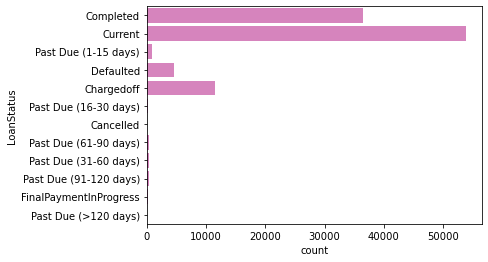

In [8]:
base_color = sb.color_palette()[6]
sb.countplot(data = df, y = 'LoanStatus', color = base_color);

We actaully do not care for how long the loan has been due. We care about whether a loan is due. Therefore, All categories where the loan is due, will be combined in one column called 'Due' 

In [9]:
#https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
df['LoanStatus'] = df['LoanStatus'].map({'Completed': 'Completed', 'Current': 'Current',
                                        'Past Due (1-15 days)': 'Due', 'Defaulted':'Defualted', 'Chargedoff': 'Chargedoff',
                                        'Past Due (16-30 days)': 'Due', 'Cancelled':'Cancelled',
                                        'Past Due (61-90 days)': 'Due', 'Past Due (31-60 days)': 'Due',
                                        'Past Due (91-120 days)': 'Due', 'FinalPaymentInProgress':'FinalPaymentInProgress',
                                        'Past Due (>120 days)': 'Due'});

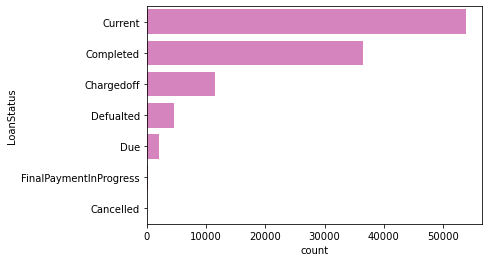

In [10]:
ordr = df['LoanStatus'].value_counts().index
sb.countplot(data = df, y = 'LoanStatus', color = base_color, order = ordr);

The largest number of loans has a 'Current' status. The completed, chargedoff and defaulted are higher than the due loans

<h3> Variable #2: Term (Loan duration) </h3> 

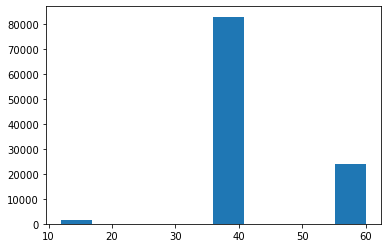

In [11]:
plt.hist(data = df, x = 'Term');

looks like the 'Term' is a nominal categorical variable
It is better to use seaborn's countplot

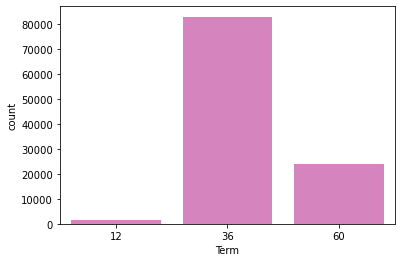

In [12]:
sb.countplot(data = df, x = 'Term', color = base_color);

Most of the borrowers go for 36 months as a term for their loans. 
Less borrowers go for 60 months and the least number of borrowers go for 12 months. 
The distribution of the term looks normal where most the borrowers chose the the middle value for their term and fewer borrowers went to the extreme terms. 

<h3> Variable #3: Borrower Annual Percentage Rate </h3> 

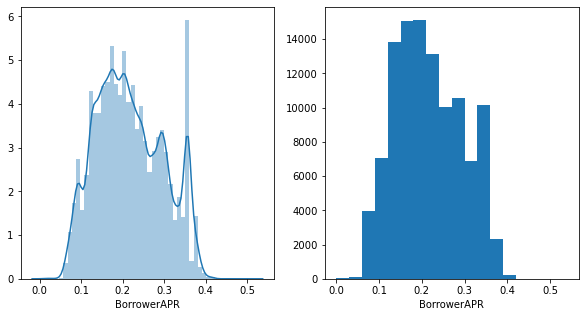

In [13]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sb.distplot(df['BorrowerAPR']);
plt.subplot(1,2,2)
bins = np.arange(0,df['BorrowerAPR'].max()+0.03,0.03)
plt.hist(data =df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('BorrowerAPR');

The borrower annual percentage rate has a unimodal distribution with a peak at around 0.2. The distribution has local peaks at other values at around 0.09, 0.3 and 0.36. The figure looks more skewed towards the right. Let's look at data distribution with a log scale and see if there are interesting characteristics.

In [14]:
np.log(df['BorrowerAPR'].describe())

count    11.594330
mean     -1.527356
std      -2.528841
min      -5.031348
25%      -1.866785
50%      -1.573347
75%      -1.280998
max      -0.668864
Name: BorrowerAPR, dtype: float64

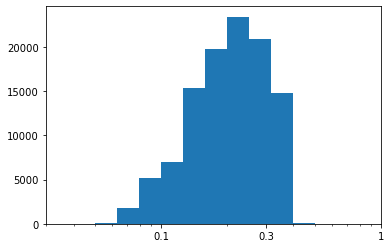

In [15]:
bins = 10 ** (np.arange(-5.5, 0,0.1))
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
ticks = [0.1, 0.3, 1]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlim([0.03,1]);

The borrower annual rate is left skewed in the log scale with a peak at around 0.2; same as the previous conclusion. 

<h3> Variable #4: Borrower Interest Rate </h3> 

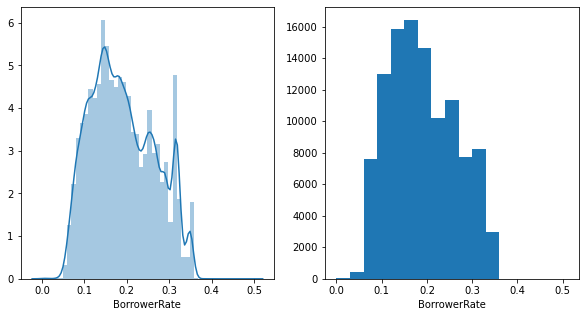

In [16]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sb.distplot(df['BorrowerRate']);
plt.subplot(1,2,2)
bins = np.arange(0,df['BorrowerRate'].max()+0.03,0.03)
plt.hist(data =df, x = 'BorrowerRate', bins = bins);
plt.xlabel('BorrowerRate');

Similar to the borrower annual percentage rate, the borrower interest rate has a unimodal with the maximum peak at 
around 0.13. it also has local peaks at other values 

<h3> Variable #5: Loan Original Amount </h3> 

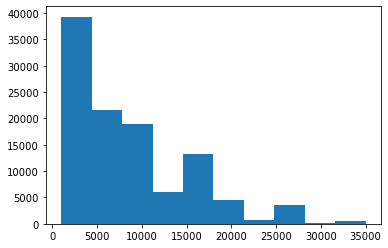

In [17]:
#Let's have a look at the distribution of the loan amounts
plt.hist(data =df, x = 'LoanOriginalAmount');

The loan amounts are right skewed where large number of the loans have small amounts, 
and the number of loans decreases with increasing loan amount.

In [18]:
#Let's have a look at the distribution of the loan amount with a log scale

In [19]:
np.log10(df['LoanOriginalAmount'].describe())

count    5.035446
mean     3.926257
std      3.796276
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

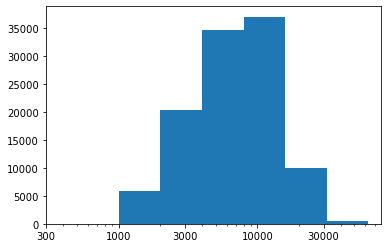

In [20]:
bins = 10 ** (np.arange(3, 5,0.3))
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
ticks = [300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels);

The loan amount has a log normal distribution with a peak at 10000. Which means most of the loans are around 10000 

<h3> Variable #6: Employment Status </h3> 

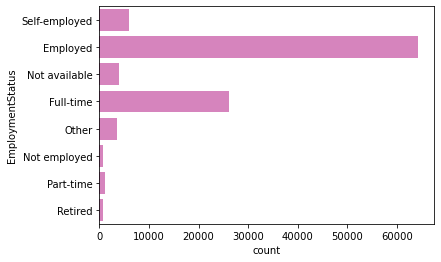

In [21]:
sb.countplot(data = df, y = 'EmploymentStatus', color = base_color);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. The loan status has different categories where the loan is due. These categories specify how long the loan has been due. However, we only care about whether the loan is due or it lies under other categories. Therefore, these categories were combined in one category named 'Due', to express that the loan is already due. 
2. The Borrower Annual Percentage rate seemed right-skewed. Therefore, a scale transformation was conducted to log scale. However, the transformation did not provide more information.
3. Loan Original amount was very right-skewed. A scale transformation was conducted to a log scale. The data appeared to have a log normal distribution. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. The dataframe had duplicates, which needed to be removed 
2. EmploymentStatus	and EmploymentStatusDuration have missing values. 

## Bivariate Exploration

In [22]:
df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,LoanOriginalAmount
0,36,Completed,0.16516,0.1580,Self-employed,2.0,True,9425
1,36,Current,0.12016,0.0920,Employed,44.0,False,10000
2,36,Completed,0.28269,0.2750,Not available,NaN,False,3001
3,36,Current,0.12528,0.0974,Employed,113.0,True,10000
4,36,Current,0.24614,0.2085,Employed,44.0,True,15000


<h3> 1. LoanStatus vs. LoanOriginalAmount </h3>

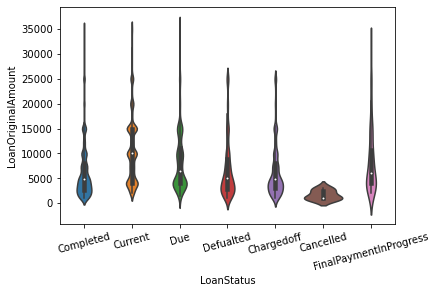

In [23]:
sb.violinplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount');
plt.xticks(rotation = 15);

I really cannot see a relation between the original loan amount and the loan's status. For all the status of the loan, the larger amount of loans reside between 0 and around 5000 and decreases while it reaches 10000. The only exception happens with the current status, but still it cannot give us an indication of a relation between the status and the amount of the loan.   

<h3> 2. LoanStatus vs. IsBorrowerHomeOwener </h3>

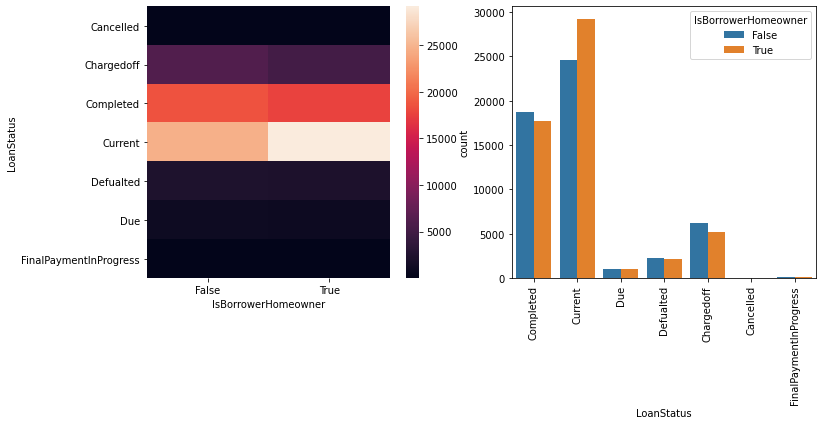

In [24]:
plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
ct_counts = df.groupby(['LoanStatus','IsBorrowerHomeowner']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts);
plt.subplot(1,2,2);
sb.countplot(data = df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner');
plt.xticks(rotation = 90);

The figure above provides some interesting information. The number of people who have houses and take loans are greater than the number of people who do not have houses. Does an ownership of a house encourage people to take loans? 
Though there is a small difference, more people with no house completed their loans than people with a house. Maybe people with tight financial conditions are more serious about repaying their debts? 

<h3> 3. LoanStatus vs. EmploymentStatus </h3>

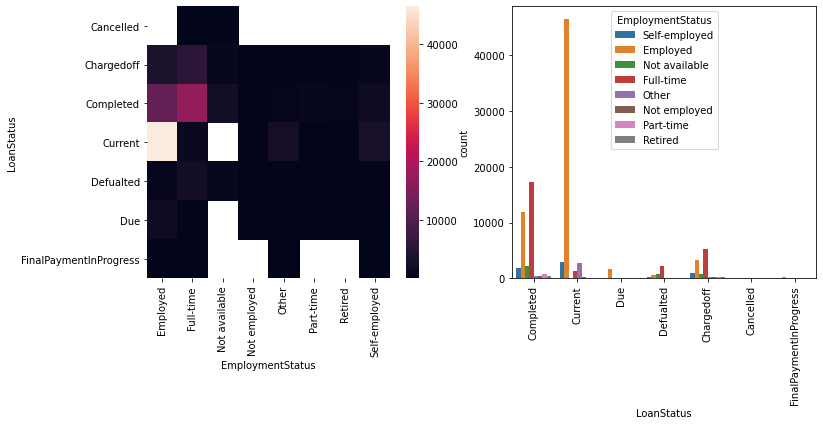

In [25]:
plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
ct_counts = df.groupby(['LoanStatus','EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')
sb.heatmap(ct_counts);
plt.subplot(1,2,2);
sb.countplot(data = df, x = 'LoanStatus', hue = 'EmploymentStatus');
plt.xticks(rotation = 90);

Among the people who have comleted their loans, the largest number have a full time job. The second largest number are employmed. Most of the people who take loans are employed. 

<h3> 4. LoanStatus vs. Term </h3>

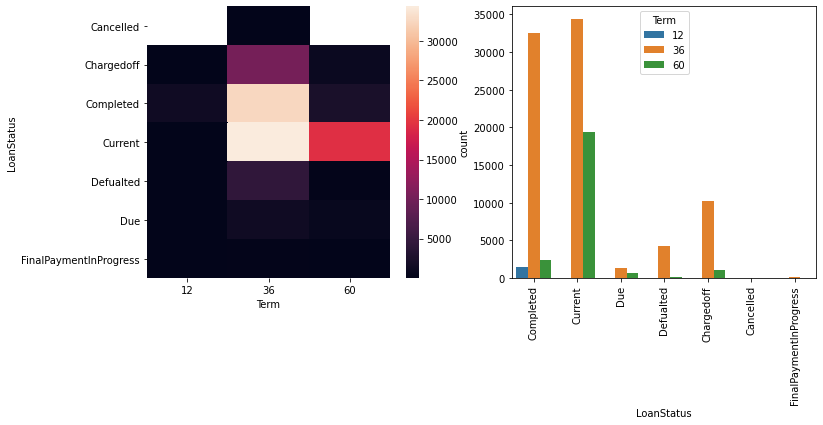

In [26]:
plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
ct_counts = df.groupby(['LoanStatus','Term']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'Term', values = 'count')
sb.heatmap(ct_counts);
plt.subplot(1,2,2);
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term');
plt.xticks(rotation = 90);

There is no apparent relation between the status and the duration of the loan. That might be the case 
because the nature of the data could be biased as most of the people tend to go for a moderate loan duration: 36 months

<h3> 5. LoanOriginalAmount vs. BorrowerRate </h3>

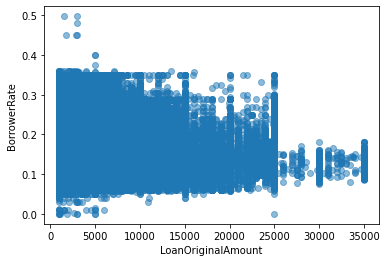

In [27]:
plt.scatter(data=df, x = 'LoanOriginalAmount', y = 'BorrowerRate', alpha = 0.5);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('BorrowerRate');

It is hard to find a relation with this overplotting even when enhanced with transparency. Let's try jittering

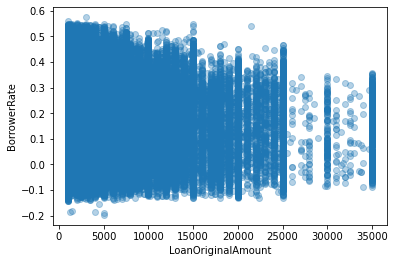

In [28]:
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

Still there is no apparent relation between the two variables. Let's apply sampling

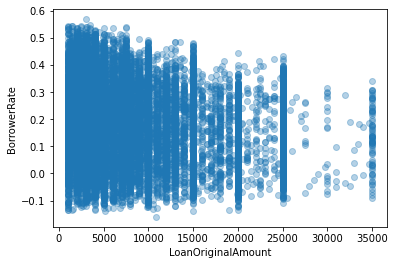

In [29]:
df_subset = df.sample(n = 20000 ,replace = False)
sb.regplot(data = df_subset, x = 'LoanOriginalAmount', y = 'BorrowerRate', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

We cannot find a relation between the LoanOriginalAmount and the BorrowerRate. We can only deduce that the number of loans decreases with increasing amount of money

<h3> 6. IsBorrowerHomeowner vs. BorrowerRate </h3>

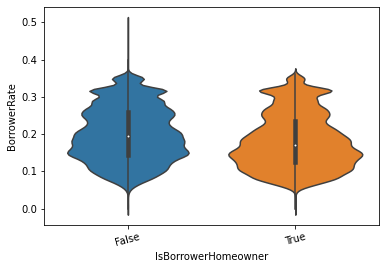

In [30]:
sb.violinplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerRate');
plt.xticks(rotation = 15);

The distribution of the borrower rate is similar for borrowers who own a house and those who do not.

<h3> 6. BorrowerAPR vs. BorrowerRate </h3>

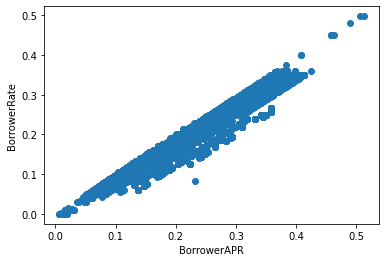

In [31]:
plt.scatter(data=df, x = 'BorrowerAPR', y = 'BorrowerRate');
plt.xlabel('BorrowerAPR');
plt.ylabel('BorrowerRate');

There is a strong positive correlation between the annual rate and the interest rate. This is an expected result.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The status of the loan is afftected by the employment. It is more likely to be employed if the person has a loan. Also, there is a relation between the ownership of the house and the status of the loan. However, the loan status is not really afftected by other features such as the original amount of the loan and the duration of the loan. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There were no interesting relations between features spotted. It was expected that the status of the loan is affected by the employment and whether the borrower owns a house. I expected to see a relation between the borrower rate and the loan's original amount, however, I could not spot any relation. 

## Multivariate Exploration

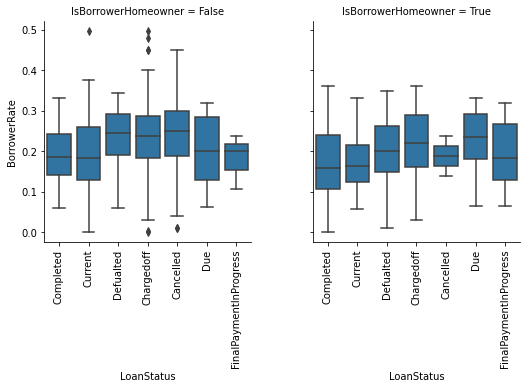

In [32]:
g = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner', size = 4)
g.map(sb.boxplot, 'LoanStatus', 'BorrowerRate')
#https://github.com/mwaskom/seaborn/issues/867
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In general, the average of the borrower rate is lower for people who own a house than those who do not

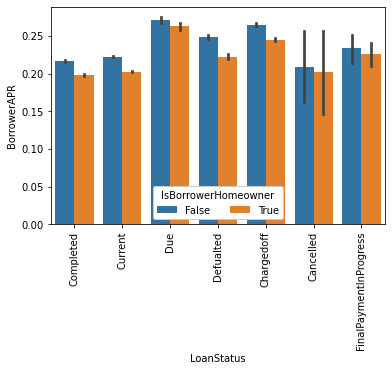

In [33]:
ax = sb.barplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'IsBorrowerHomeowner');
plt.xticks(rotation = 90);

For all the loan's status, the BorrowerAPR is higher for poeple who do not own a house.

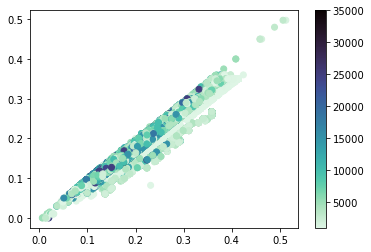

In [34]:
plt.scatter(data = df, x = 'BorrowerAPR', y = 'BorrowerRate', c = 'LoanOriginalAmount',
            cmap = 'mako_r')
plt.colorbar();

There is no distinguishable effect in the relation between the borrower rate and interest due to the loan original amount.

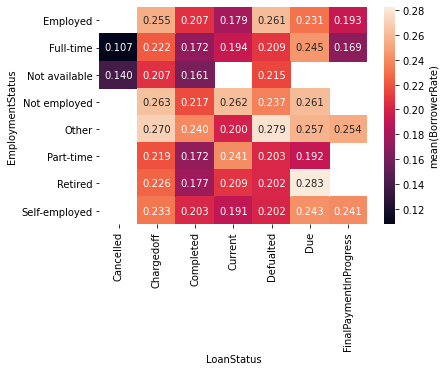

In [35]:
cat_means = df.groupby(['LoanStatus', 'EmploymentStatus']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'LoanStatus',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerRate)'});

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>For this dataset, most of the relations could be spotted in the bivariate analysis. The multivariate visulizations did not spot much information. 

### Were there any interesting or surprising interactions between features?

> Not in the multivariate analysis